<a href="https://colab.research.google.com/github/jaekyoungkim/2020_modoo_algorithm/blob/main/DW_CARD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 세팅 

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
from matplotlib import font_manager, rc
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
#4/1AX4XfWgKzT5FnEsEqbHv_MJeAYGD6bx-GaC_4wW5f-wWQPUEX9zI2zEL4ug

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
plt.rcParams['font.family'] = 'AppleGothic'

In [ ]:
# 연체한사람의 특성 / 연체자의 구분되는 특징 

# 2. 데이터 불러오기 

In [79]:
# 월별 구분한 데이터
#data1 = pd.read_csv('gdrive/MyDrive/DW_DATA/CARD_DATA(1).csv', encoding = 'cp949')  # cp949

# 소장 개인사용금액 수정한 데이터 사용
data1 = pd.read_csv('gdrive/MyDrive/DW_DATA/CARD_DATA_time_y.csv', encoding = 'cp949')  # cp949

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25,30,43,44,45,46,47,48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [80]:
 # 월별 구분하지 않은 데이터
data2 = pd.read_csv('gdrive/MyDrive/DW_DATA/CARD_DATA(2)_time_n.csv', encoding = 'cp949')  # cp949

In [51]:
# 사번이중간에 바뀐리스트 뽑아서 전달


In [81]:
# 필터링1 :ETC영업본부만 가지고 다시 돌리기 
#ETC영업본부만 진행하고자 함. 데이터 필터를 거침 data1, data2에 모두 적용
data1= data1[data1['본부']=='ETC본부']
data2= data2[data2['본부']=='ETC본부']

In [ ]:
# 필터링2 : 직원아닌 사람들의 개인사용금액 수정
# 개인사용금액중에서 전표완료한 금액은 개인사용금액에서 제외함
# 승인금액은 고정
# 개인사용금액의 감소분을 detail금액으로 이동(개인사용목적이 아니면 Detail이라고 판단)

# 3. 데이터 탐색 

In [13]:
data1.head(3)  # 1412 rows
len(data1)

18465

In [ ]:
data1.shape  # 18465, 37


(18465, 37)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18465 entries, 0 to 18464
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   카드번호                18465 non-null  object 
 1   기간                  18465 non-null  object 
 2   년도                  18465 non-null  int64  
 3   월                   18465 non-null  int64  
 4   분기                  18465 non-null  object 
 5   승인금액                18465 non-null  int64  
 6   사번                  18465 non-null  int64  
 7   소장여부                18465 non-null  object 
 8   본부                  18465 non-null  object 
 9   센터                  18063 non-null  object 
 10  팀                   18465 non-null  object 
 11  회원명                 18465 non-null  object 
 12  종류                  18465 non-null  object 
 13  mp총금액               18465 non-null  int64  
 14  ip총금액               18465 non-null  int64  
 15  detail총금액           18465 non-null  int64  
 16  cps총

In [ ]:
data2.head(3) # (1645, 22)

,카드번호,종류,사번,회원명,카드번호&사번&종류,승인금액,mp총금액,ip총금액,detail총금액,cps총금액,개인사용,연체여부,연체금액_부서경비,연체금액_세미나,연체금액_디테일,연체금액_조직활성화,연체금액_전체,사용개월수,본부,센터,팀,소속기준월,영업사원성별,영업사원나이,영업사원나이대,영업사원직책
0,4025-9610-3588-3509,현대,2000077,우동한,4025-9610-3588-35092000077현대,14202670.0,0.0,0.0,841000.0,841000.0,13361670.0,1.0,0.0,0.0,268207.0,0.0,268207.0,18,ETC본부,NaN,입찰전략팀,2021-03-01,NaN,NaN,NaN,NaN
1,4025-9610-3588-5405,현대,2160388,국길환,4025-9610-3588-54052160388현대,281520.0,0.0,0.0,0.0,0.0,281520.0,1.0,0.0,0.0,1007.0,0.0,1007.0,2,ETC로컬본부,NaN,큐레이션기획1팀,2019-11-01,NaN,NaN,NaN,NaN
2,4025-9610-4487-6304,현대,2190140,이성규,4025-9610-4487-63042190140현대,26400520.0,0.0,0.0,15046990.0,15046990.0,11353530.0,1.0,0.0,0.0,0.0,0.0,0.0,17,CH본부,NaN,CH채널기획팀,2021-03-01,NaN,NaN,NaN,NaN


In [82]:
# 새로운 컬럼 생성
# 1. 개인사용 비율
data2['개인사용비율'] = data2['개인사용'] / data2['승인금액']
# 2 mp ip detail 비율
data2['ip_ratio'] = data2['ip총금액'] / data2['cps총금액']
data2['mp_ratio'] = data2['mp총금액'] / data2['cps총금액']
data2['detail_ratio'] = data2['detail총금액'] / data2['cps총금액']



In [83]:
data2.shape #수정전 1645행

(1406, 34)

In [ ]:
data2.head(3)

,카드번호,종류,사번,회원명,카드번호&사번&종류,승인금액,mp총금액,ip총금액,detail총금액,cps총금액,개인사용,연체여부,연체금액_부서경비,연체금액_세미나,연체금액_디테일,연체금액_조직활성화,연체금액_전체,사용개월수,본부,센터,팀,소속기준월,영업사원성별,영업사원나이,영업사원나이대,영업사원직책,개인사용비율,ip_ratio,mp_ratio,detail_ratio
0,4670-6901-0008-6254,삼성,2020347,박수진,4670-6901-0008-62542020347삼성,53456466.0,0.0,0.0,0.0,0.0,53456466.0,0.0,0.0,0.0,0.0,0.0,0.0,18,ETC본부,서울4사업부,서울4사업부,2021-03-01,남자,50.0,50.0,본부장,1.0,NaN,NaN,NaN
1,4670-6901-0017-0512,삼성,2020347,박수진,4670-6901-0017-05122020347삼성,35873690.0,0.0,0.0,0.0,0.0,35873690.0,0.0,0.0,0.0,0.0,0.0,0.0,18,ETC본부,서울4사업부,서울4사업부,2021-03-01,남자,50.0,50.0,본부장,1.0,NaN,NaN,NaN
2,4670-6901-0014-5043,삼성,2030273,유창득,4670-6901-0014-50432030273삼성,135770867.0,0.0,0.0,0.0,0.0,135770867.0,0.0,0.0,0.0,0.0,0.0,0.0,18,ETC본부,서울3사업부,서울3사업부,2021-03-01,남자,45.0,40.0,사업부장,1.0,NaN,NaN,NaN


### 월별구분없는 데이터 

In [84]:
# 마케팅횟수
corr_data = data2[['승인금액','mp총금액','ip총금액','detail총금액','cps총금액','개인사용','연체여부'
                    ,'연체금액_전체','사용개월수','개인사용비율','ip_ratio','mp_ratio','detail_ratio']]
corr= corr_data.corr()


In [85]:
corr

,승인금액,mp총금액,ip총금액,detail총금액,cps총금액,개인사용,연체여부,연체금액_전체,사용개월수,개인사용비율,ip_ratio,mp_ratio,detail_ratio
승인금액,1.000000,0.084390,0.129906,0.726338,0.856661,0.792258,0.267945,0.274925,0.278530,0.012786,-0.310105,-0.219918,0.401471
mp총금액,0.084390,1.000000,0.047757,-0.260750,0.104356,0.028935,0.075999,0.068758,0.106006,-0.084282,-0.056416,0.709196,-0.429674
ip총금액,0.129906,0.047757,1.000000,-0.293495,0.261303,-0.074523,0.046675,0.018123,0.096105,-0.280603,0.644802,-0.067161,-0.482886
detail총금액,0.726338,-0.260750,-0.293495,1.000000,0.787942,0.379436,0.174675,0.197779,0.176660,-0.167015,-0.479009,-0.373258,0.642656
cps총금액,0.856661,0.104356,0.261303,0.787942,1.000000,0.363913,0.233968,0.239773,0.273702,-0.357549,-0.163289,-0.178300,0.253336
개인사용,0.792258,0.028935,-0.074523,0.379436,0.363913,1.000000,0.207042,0.212779,0.180107,0.445997,-0.404496,-0.202200,0.466868
연체여부,0.267945,0.075999,0.046675,0.174675,0.233968,0.207042,1.000000,0.887453,0.061900,0.006080,-0.075921,-0.020099,0.075648
연체금액_전체,0.274925,0.068758,0.018123,0.197779,0.239773,0.212779,0.887453,1.000000,0.036149,0.013287,-0.083625,-0.013615,0.077606
사용개월수,0.278530,0.106006,0.096105,0.176660,0.273702,0.180107,0.061900,0.036149,1.000000,-0.065533,0.015928,-0.012789,-0.004460
개인사용비율,0.012786,-0.084282,-0.280603,-0.167015,-0.357549,0.445997,0.006080,0.013287,-0.065533,1.000000,-0.454670,-0.072099,0.420652


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


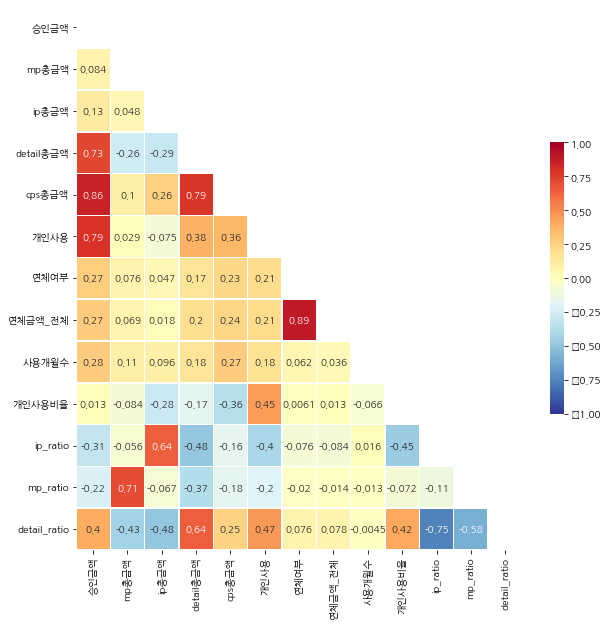

In [86]:
fig, ax = plt.subplots( figsize=(10,10) )

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [12]:
check = data2[(data2['영업사원직책']=="본부장")]

In [13]:
check= check.drop_duplicates() 

In [50]:
check

,카드번호,종류,사번,소장여부,회원명,카드번호&사번&종류,pre_승인금액,승인금액,mp총금액,ip총금액,detail총금액,cps총금액,pre_개인사용,개인사용,연체여부,연체금액_부서경비,연체금액_세미나,연체금액_디테일,연체금액_조직활성화,연체금액_전체,사용개월수,본부,센터,팀,소속기준월,영업사원성별,영업사원나이,영업사원나이대,영업사원직책,개인사용비율,ip_ratio,mp_ratio,detail_ratio
0,4670-6901-0008-6254,삼성,2020347,N,박수진,4670-6901-0008-62542020347삼성,53456466.0,53456466,0.0,0.0,0.0,0.0,53456466.0,53456466,0.0,0.0,0.0,0.0,0.0,0.0,18,ETC본부,서울4사업부,서울4사업부,2021-03-01,남자,50.0,50.0,본부장,1.0,NaN,NaN,NaN
1,4670-6901-0017-0512,삼성,2020347,N,박수진,4670-6901-0017-05122020347삼성,35873690.0,35873690,0.0,0.0,0.0,0.0,35873690.0,35873690,0.0,0.0,0.0,0.0,0.0,0.0,18,ETC본부,서울4사업부,서울4사업부,2021-03-01,남자,50.0,50.0,본부장,1.0,NaN,NaN,NaN


In [15]:
a=check['사번'].unique()
len(a)

1

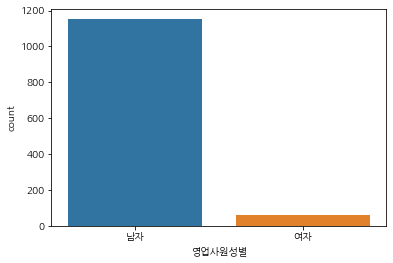

In [59]:
sns.countplot(data=data2, x="영업사원성별")
# 전체 법인카드 사용중 현대 > 삼성

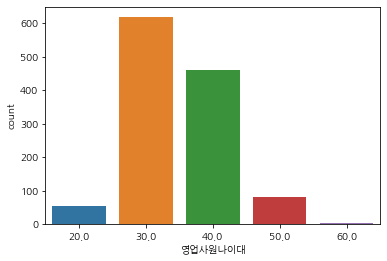

In [60]:
sns.countplot(data=data2, x="영업사원나이대")


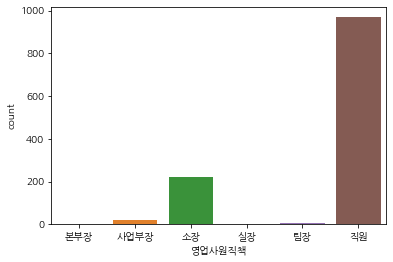

In [61]:
sns.countplot(data=data2, x="영업사원직책")
# 소장의 비율이높음
# ETC영업본부만 가지고 할경우 거의 대부분이 직원임

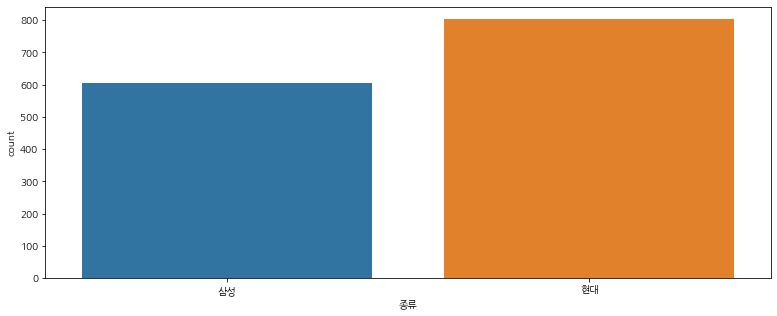

In [62]:
plt.figure(figsize=(13, 5))
sns.countplot(data=data2, x="종류")
# 전체 법인카드 사용중 현대 > 삼성

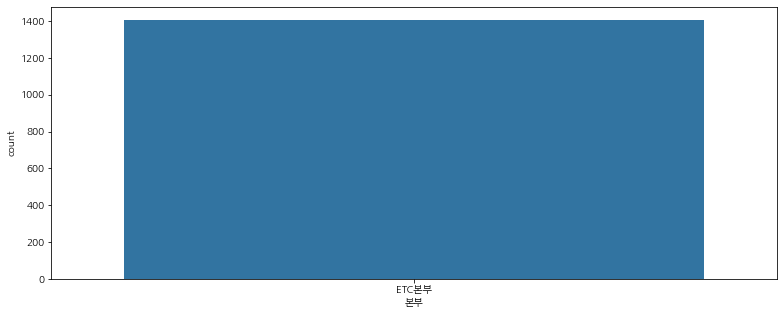

In [63]:
plt.figure(figsize=(13, 5))
sns.countplot(data=data2, x="본부")
# etc 병원에서 처방받은 약만 가능
# ch 약국에서 
# 수정후 ETC본부만 가지고 확인

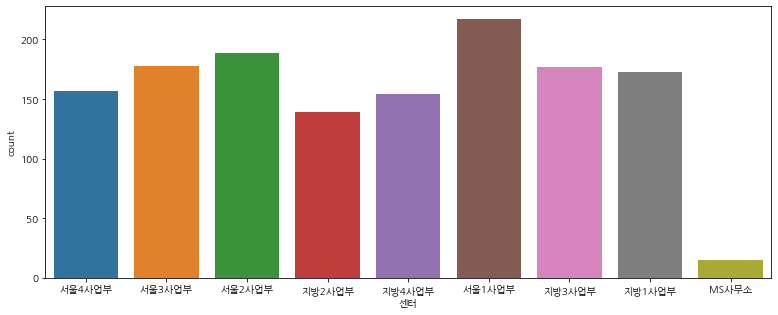

In [64]:
plt.figure(figsize=(13, 5))
sns.countplot(data=data2, x="센터")


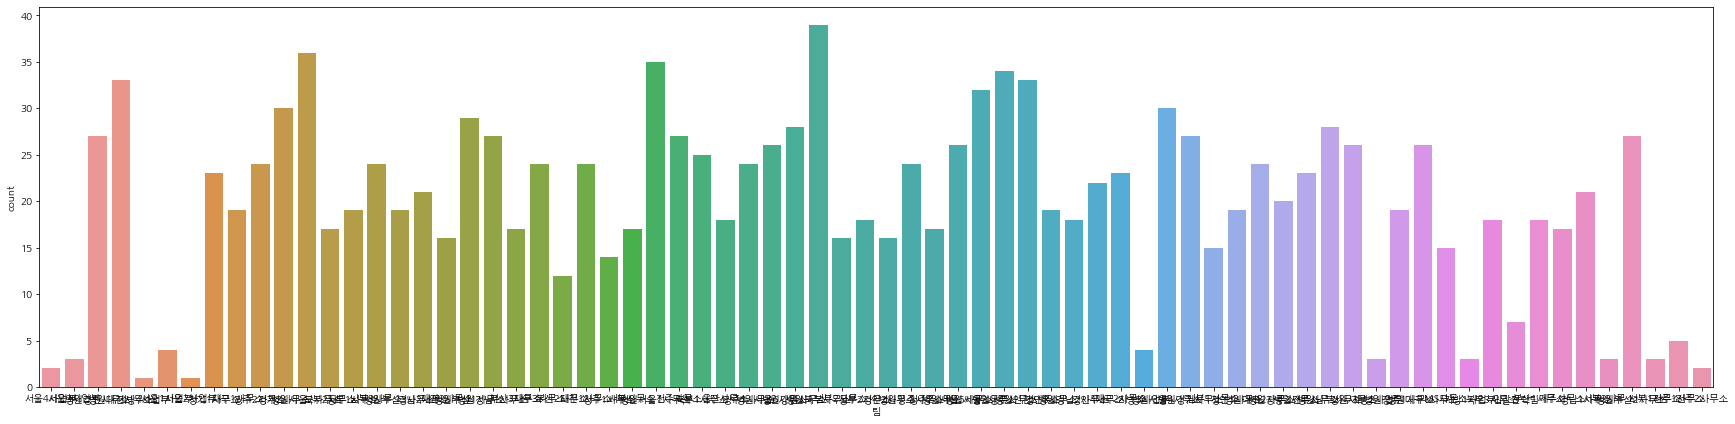

In [65]:
plt.figure(figsize=(30, 7))
sns.countplot(data=data2, x="팀")
#

In [66]:
# 현대 / 삼성 카드의 개인사용비율 확인
cardsum=data2['승인금액'].groupby(data2['종류']).sum()
cardsum
cardsum2=data2['개인사용'].groupby(data2['종류']).sum()
cardsum2
cardsum2/cardsum  # 삼성카드보다 현대카드의 개인사용 비율이 높음
# 수정전 
#삼성    0.382258
#현대    0.471207
# 수정후
#삼성    0.372015
#현대    0.459136


종류
삼성    0.372015
현대    0.459136
dtype: float64

In [87]:
# 성별에 따른 개인사용비율 확인
cardsum=data2['승인금액'].groupby(data2['영업사원성별']).sum()
cardsum
cardsum2=data2['개인사용'].groupby(data2['영업사원성별']).sum()
cardsum2
cardsum2/cardsum  # 여성보다 남성의 개인사용비율이 높음
# 수정전
#남자    0.449242
#여자    0.417940
# 수정후
#남자    0.430223
#여자    0.414780


영업사원성별
남자    0.430223
여자    0.414780
dtype: float64

In [88]:
# 영업사원 나이대에따른 개인사용비율 확인
cardsum=data2['승인금액'].groupby(data2['영업사원나이대']).sum()
cardsum
cardsum2=data2['개인사용'].groupby(data2['영업사원나이대']).sum()
cardsum2
cardsum2/cardsum  #  40~50대의 개인사용 비율이 20-30대의 개인사용비율보다 현저히 높게 나타남
# 수정전
#영업사원나이대
#20.0    0.363014
#30.0    0.380278
#40.0    0.551770
#50.0    0.546346
#60.0    0.393153

# 수정후
#20.0    0.363014
#30.0    0.376236
#40.0    0.517975
#50.0    0.493550
#60.0    0.376447

영업사원나이대
20.0    0.363014
30.0    0.376236
40.0    0.517975
50.0    0.493550
60.0    0.376447
dtype: float64

In [89]:
# 영업사원 직책대에따른 개인사용비율 확인
cardsum=data2['승인금액'].groupby(data2['영업사원직책']).sum()
cardsum
cardsum2=data2['개인사용'].groupby(data2['영업사원직책']).sum()
cardsum2
cardsum2/cardsum  #  직책이 있는분들이 쓰시는 법인카드는 대부분 개인용도로 많이 사용되고 있음
# 수정전
#영업사원직책
#본부장     1.000000
#사업부장    0.929440
#소장      0.737586
#소장대행    0.830556
#실장      1.000000
#직원      0.382539
#팀장      0.801498

# 수정후 : 사업부장, 소장,소장대행의 개인사용비율이 감소함
#본부장     1.000000
#사업부장    0.882148
#소장      0.656623
#실장      0.052936
#직원      0.378809
#팀장      0.771668

영업사원직책
본부장     1.000000
사업부장    0.882148
소장      0.656623
실장      0.052936
직원      0.378809
팀장      0.771668
dtype: float64

In [90]:
# 본부에따른 개인사용비율 확인
cardsum=data2['승인금액'].groupby(data2['본부']).sum()
cardsum
cardsum2=data2['개인사용'].groupby(data2['본부']).sum()
cardsum2
cardsum2/cardsum 
# ETC로컬본부의 개인사용이 가장 많음 ETC본부, CH본부의 개인사용비율은 낮은편에 속함
# 수정전
#본부
#CH본부       0.493122
#ETC로컬본부    0.719106
#ETC병원본부    0.652224
#ETC본부      0.441613
#ETC영업본부    0.655792

# 수정후
#본부
#ETC본부     0.428261

본부
ETC본부    0.428261
dtype: float64

In [91]:
# 센터에따른 개인사용비율 확인
cardsum=data2['승인금액'].groupby(data2['센터']).sum()
cardsum
cardsum2=data2['개인사용'].groupby(data2['센터']).sum()
cardsum2
cardsum2/cardsum 
# 거의 대부분의 사업부들이 비슷함가장 많은 개인사용비율은 CH2사업부이나 다른 부서와 크게 차이는 없음
# 수정후
# 지방3사업부서울3사업부가 높게 나타남

센터
MS사무소     0.393543
서울1사업부    0.421284
서울2사업부    0.422354
서울3사업부    0.445859
서울4사업부    0.431665
지방1사업부    0.396600
지방2사업부    0.416122
지방3사업부    0.445429
지방4사업부    0.442126
dtype: float64

In [92]:
# 팀에따른 개인사용비율 확인
cardsum=data2['승인금액'].groupby(data2['팀']).sum()
cardsum
cardsum2=data2['개인사용'].groupby(data2['팀']).sum()
cardsum2
team=cardsum2/cardsum
team_df = pd.DataFrame(team)
team =team.sort_values( ascending=False)
team

팀
지방4사업부     1.000000
지방2사업부     1.000000
서울4사업부     1.000000
서울2사업부     1.000000
서울1사업부     1.000000
             ...   
경기1사무소     0.362471
병원인천사무소    0.355046
동부1사무소     0.353628
경남2사무소     0.343790
지방1사업부     0.052936
Length: 72, dtype: float64

In [93]:
team=pd.DataFrame(team)
type(team)
team.columns
#team['팀'].str.contains('팀')
team
team = team.rename_axis('팀').reset_index()


In [94]:
team=team[team['팀'].str.contains('사무소')]
team.head(15) # 사무소라는 단어가 포함된것만 보여줌
# 여기나오는 팀/사무소는 개인사용비율이 높은곳들로 확인 필요
# 서부1사무소(0.79) > 전주1사무소(0.74) > 전주2사무소	 >...
# 병원인천사무소    0.364554 인것에 비해서 높은 수치임

,팀,0
8,서부1사무소,0.797193
9,전주1사무소,0.741772
10,전주2사무소,0.530308
11,대구3사무소,0.505517
12,경남1사무소,0.486836
13,병원남부사무소,0.482112
14,북부1사무소,0.478921
15,청주1사무소,0.475645
16,청주2사무소,0.474446
17,병원경남2사무소,0.463260


In [95]:
# 사용개월수에따른 개인사용비율 확인
cardsum=data2['승인금액'].groupby(data2['사용개월수']).sum()
cardsum
cardsum2=data2['개인사용'].groupby(data2['사용개월수']).sum()
cardsum2
card_month = cardsum2/cardsum
card_month 

사용개월수
2     0.647725
3     0.537782
4     0.478824
5     0.735708
6     0.534567
7     0.314882
8     0.443673
9     0.558502
10    0.520648
11    0.547089
12    0.416182
13    0.360657
14    0.351250
15    0.405483
16    0.387331
17    0.435649
18    0.428344
19    0.415898
20    0.338219
21    0.366289
22    0.368469
dtype: float64

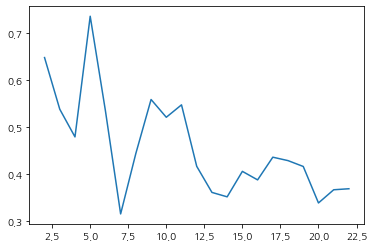

In [96]:
plt.plot(card_month)
# 사용개월수가 늘어날수록 개인사용비율이 적어지는것을 확인가능
# 7-8개월일때 개인사용비율이 높은것을 화인가능

In [97]:
# 연체여부에 따른 개인사용비율 확인
cardsum=data2['승인금액'].groupby(data2['연체여부']).count()
cardsum
# 구간을 나누고자함, 0 / 1 / 2 / 3 / 4 / 5-10 / 10이상

연체여부
0.0     1026
1.0      145
2.0       67
3.0       38
4.0       28
5.0       30
6.0       22
7.0        9
8.0       13
9.0       11
10.0       6
11.0       3
14.0       3
15.0       1
16.0       1
18.0       1
24.0       1
Name: 승인금액, dtype: int64

In [98]:

def late(x):
 if x==0: return '0'
 elif x==1: return '1'
 elif x==2: return '2'
 elif x==3: return '3'
 elif x==4: return '4'
 elif x<10: return '5-9' 
 else: return '10이상'
data2["연체구분"] = data2["연체여부"].apply(late)
data2.head(2)

,카드번호,종류,사번,소장여부,회원명,카드번호&사번&종류,승인금액,mp총금액,ip총금액,pre_detail총금액,detail총금액,pre_cps총금액,cps총금액,pre_개인사용,개인사용,연체여부,연체금액_부서경비,연체금액_세미나,연체금액_디테일,연체금액_조직활성화,연체금액_전체,사용개월수,본부,센터,팀,소속기준월,영업사원성별,영업사원나이,영업사원나이대,영업사원직책,개인사용비율,ip_ratio,mp_ratio,detail_ratio,연체구분
0,4670-6901-0008-6254,삼성,2020347,N,박수진,4670-6901-0008-62542020347삼성,53456466.0,0.0,0.0,0.0,0.0,0.0,0.0,53456466.0,53456466,0.0,0.0,0.0,0.0,0.0,0.0,18,ETC본부,서울4사업부,서울4사업부,2021-03-01,남자,50.0,50.0,본부장,1.0,NaN,NaN,NaN,0
1,4670-6901-0017-0512,삼성,2020347,N,박수진,4670-6901-0017-05122020347삼성,35873690.0,0.0,0.0,0.0,0.0,0.0,0.0,35873690.0,35873690,0.0,0.0,0.0,0.0,0.0,0.0,18,ETC본부,서울4사업부,서울4사업부,2021-03-01,남자,50.0,50.0,본부장,1.0,NaN,NaN,NaN,0


In [100]:
# 연체여부에 따른 개인사용비율 확인
cardsum=data2['승인금액'].groupby(data2['연체구분']).sum()
cardsum
cardsum2=data2['개인사용'].groupby(data2['연체구분']).sum()
cardsum2
card_late = cardsum2/cardsum
card_late 
# 연체개월이 0일때의개인사용비율이 가장 높음(43%) , 10번이상 연체한것에 대해서 개인사용비율이 가장낮음(40%) 그러나 큰 차이는 아니라고 여겨짐
# 연체를 많이하게 되면 개인사용 비율을 줄이나봄

연체구분
0       0.433740
1       0.408474
10이상    0.400533
2       0.414171
3       0.413330
4       0.444055
5-9     0.431924
dtype: float64

In [101]:
# 연체여부에 따른 개인사용비율 확인
cardsum=data2['승인금액'].groupby(data2['연체여부']).sum()
cardsum
cardsum2=data2['개인사용'].groupby(data2['연체여부']).sum()
cardsum2
card_late = cardsum2/cardsum
card_late 
# 연체여부개월수에 따라서 개인사용비율이 들쑥날쑥 하긴하지만 샘플수가 적어서 나타나는 문제인듯하다
# 24개월의 연체를 했을경우의 개인사용비율은 55%로 가장 높다. 
# 이를 검증하기위해 좀더 많은 데이터가 필요할 것 같다.

연체여부
0.0     0.433740
1.0     0.408474
2.0     0.414171
3.0     0.413330
4.0     0.444055
5.0     0.386952
6.0     0.407443
7.0     0.487453
8.0     0.450523
9.0     0.524034
10.0    0.408166
11.0    0.288863
14.0    0.417408
15.0    0.322445
16.0    0.443093
18.0    0.406179
24.0    0.555650
dtype: float64

In [104]:
cardsum=data2['승인금액'].groupby(data2['연체여부']).count()
cardsum
# 거의 대부분이 연체를 하지않음

연체여부
0.0     1026
1.0      145
2.0       67
3.0       38
4.0       28
5.0       30
6.0       22
7.0        9
8.0       13
9.0       11
10.0       6
11.0       3
14.0       3
15.0       1
16.0       1
18.0       1
24.0       1
Name: 승인금액, dtype: int64

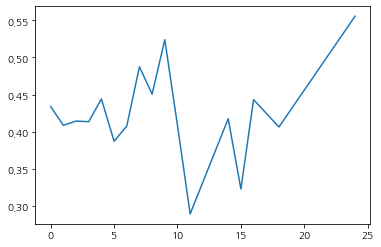

In [105]:
plt.plot(card_late) # 연체개월수가 많아지는 영업사원의 개인사용비율 높아지는 추세를 보임
# 연체개월 구간별 영업사원의 개인사용비율이 다르게 나타남
# 연체개월이 높아질수록 개인사용비율이 높아진다고 볼수 있다. 10-20구간의 데이터가 많이 부족해서 나타나는 현상이라 보인다.

In [106]:
# 나이/성별/직책에 따른 개인사용비율 확인
cardsum=data2['승인금액'].groupby([data2['영업사원성별'],data2['영업사원나이대']]).sum()
cardsum
cardsum2=data2['개인사용'].groupby([data2['영업사원성별'],data2['영업사원나이대']]).sum()
cardsum2
cardsum2/cardsum  
# 남자 40-50, 여자 40대의 개인사용비율이 높은걸 확인가능
# 수정전
#영업사원성별  영업사원나이대
#남자      20.0       0.353029
#        30.0       0.377568
#        40.0       0.551253
#        50.0       0.546346
#        60.0       0.393153
#여자      20.0       0.391891
#        30.0       0.414935
#        40.0       0.683465


영업사원성별  영업사원나이대
남자      20.0       0.353029
        30.0       0.373472
        40.0       0.517277
        50.0       0.493550
        60.0       0.376447
여자      20.0       0.391891
        30.0       0.411204
        40.0       0.696883
dtype: float64

In [ ]:
##################### 1인당 개인사용금액 확인해보기 ########################

In [107]:
# 성별에 따른 1인당 사용금액
cardsum=data2['개인사용'].groupby(data2['영업사원성별']).sum()
cardsum
cardsum2=data2['개인사용'].groupby(data2['영업사원성별']).count()
cardsum2
a=card_month = cardsum/cardsum2
card_month 
# 남자가 1인당 사용금액이 약간 많은걸 확인가능

영업사원성별
남자    9.381439e+06
여자    9.087057e+06
Name: 개인사용, dtype: float64

<BarContainer object of 2 artists>

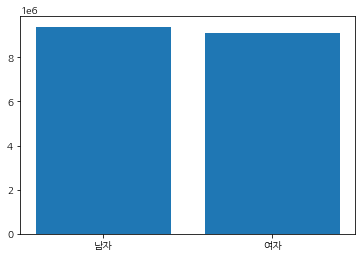

In [108]:
b = pd.DataFrame(a)
df = b.rename_axis('c').reset_index()
plt.bar(df['c'],df['개인사용'])

In [109]:
# 연령대에 따른 1인당 사용금액
cardsum=data2['개인사용'].groupby(data2['영업사원나이대']).sum()
cardsum
cardsum2=data2['개인사용'].groupby(data2['영업사원나이대']).count()
cardsum2
a = card_month = cardsum/cardsum2
card_month 
# 40대,60대가 1인당 사용금액 가장많고, 20대가 1인당 사용금액 적음

영업사원나이대
20.0    6.617921e+06
30.0    9.249823e+06
40.0    1.002046e+07
50.0    8.328227e+06
60.0    1.067286e+07
Name: 개인사용, dtype: float64

<BarContainer object of 5 artists>

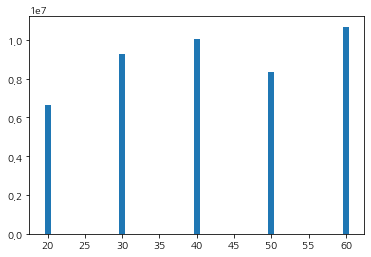

In [110]:
b = pd.DataFrame(a)
df = b.rename_axis('c').reset_index()
plt.bar(df['c'],df['개인사용'])

In [111]:
# 영업사원직책 따른 1인당 사용금액
cardsum=data2['개인사용'].groupby(data2['영업사원직책']).sum()
cardsum
cardsum2=data2['개인사용'].groupby(data2['영업사원직책']).count()
a=cardsum/cardsum2
cardsum/cardsum2
# 본부장 , 사업부장이 가장 많음, 직원보다 팀장/실장이 더 적게 사용
# 실장은 개인사용으로 거의 사용하지 않는듯하다.

영업사원직책
본부장     4.466508e+07
사업부장    2.445601e+07
소장      1.110949e+07
실장      1.012600e+06
직원      8.650373e+06
팀장      8.434255e+06
Name: 개인사용, dtype: float64

<BarContainer object of 6 artists>

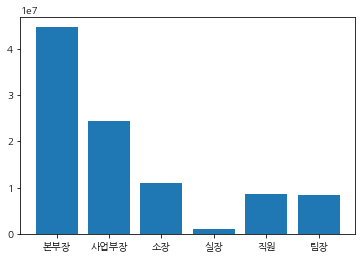

In [112]:
b = pd.DataFrame(a)
df = b.rename_axis('c').reset_index()
plt.bar(df['c'],df['개인사용'])
#

In [113]:
# 본부 따른 1인당 사용금액
cardsum=data2['개인사용'].groupby(data2['본부']).sum()
cardsum
cardsum2=data2['개인사용'].groupby(data2['본부']).count()
cardsum2
a=cardsum/cardsum2


<BarContainer object of 1 artists>

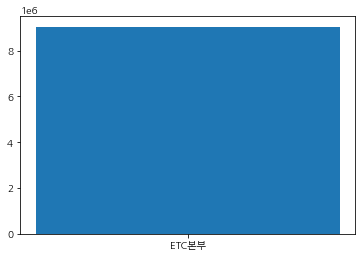

In [114]:
b = pd.DataFrame(a)
df = b.rename_axis('c').reset_index()
plt.bar(df['c'],df['개인사용'])

In [115]:
# 센터 따른 1인당 사용금액
cardsum=data2['개인사용'].groupby(data2['센터']).sum()
cardsum
cardsum2=data2['개인사용'].groupby(data2['센터']).count()
cardsum2
a=cardsum/cardsum2


<BarContainer object of 9 artists>

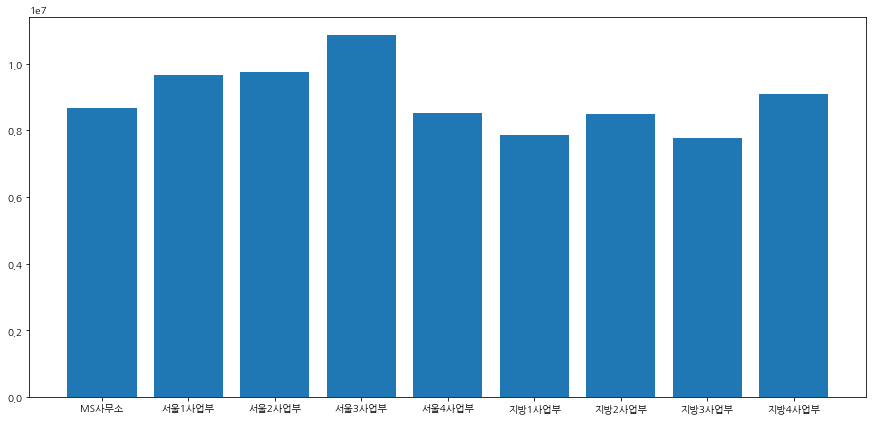

In [116]:
plt.figure(figsize=(15, 7))
b = pd.DataFrame(a)
df = b.rename_axis('c').reset_index()
plt.bar(df['c'],df['개인사용'])
# 서울3사업부의 1인당 개인사용금액이 가장 많음

In [117]:
# 팀에 따른 1인당 사용금액
cardsum=data2['개인사용'].groupby(data2['팀']).sum()
cardsum
cardsum2=data2['개인사용'].groupby(data2['팀']).count()
cardsum2
a=cardsum/cardsum2


In [118]:
# 상위 10개
top10= a.sort_values( ascending=False).head(15)
top10

팀
지방4사업부      6.526276e+07
서울2사업부      6.090011e+07
서울3사업부      4.693331e+07
서울4사업부      4.466508e+07
서울1사업부      2.271377e+07
지방2사업부      1.772941e+07
서부사무소       1.359774e+07
병원경인사무소     1.352131e+07
부산2사무소      1.284045e+07
북부3사무소      1.233441e+07
북부2사무소      1.233235e+07
지방3사업부      1.233013e+07
병원서울4사무소    1.153698e+07
경인2사무소      1.127323e+07
병원서울5사무소    1.112000e+07
Name: 개인사용, dtype: float64

<BarContainer object of 15 artists>

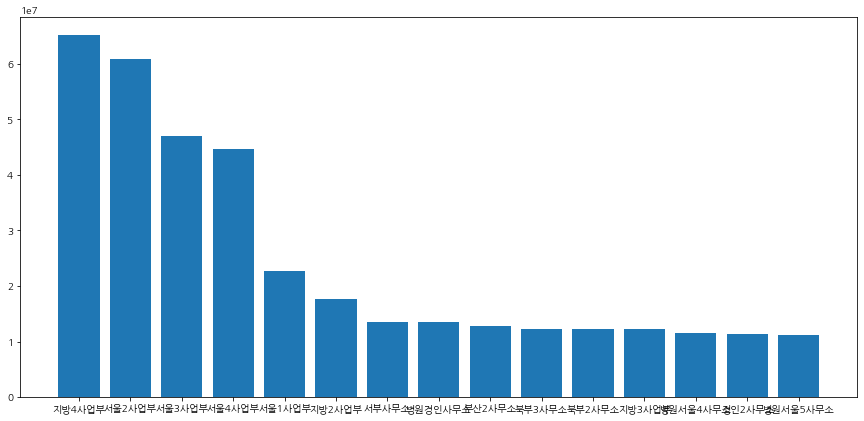

In [119]:
plt.figure(figsize=(15, 7))
b = pd.DataFrame(top10)
df = b.rename_axis('c').reset_index()
plt.bar(df['c'],df['개인사용'])
# 지방4사업부의 1인당 개인사용금액이 가장 많음
# 사무소 중에서는 서부사무소의 1인당 개인사용 금액이 가장 높음

<BarContainer object of 15 artists>

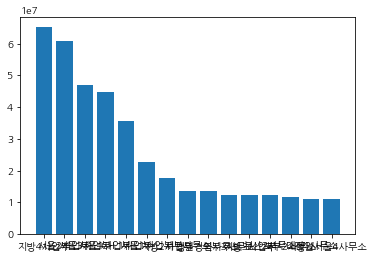

In [46]:
plt.bar(df['c'],df['개인사용'])

In [120]:
# 하위 10개
low10=a.sort_values( ascending=True).head(15)
low10

팀
지방1사업부      1.012600e+06
서부2사무소      2.444930e+06
병원강원사무소     5.001965e+06
청주2사무소      5.093110e+06
울산사무소       5.687289e+06
경남2사무소      6.240409e+06
경인4사무소      6.285229e+06
제주사무소       6.339239e+06
동부1사무소      6.545570e+06
대구3사무소      6.588407e+06
병원대구2사무소    6.647305e+06
대전2사무소      6.649642e+06
경인3사무소      6.725620e+06
병원대구1사무소    6.750157e+06
병원청주사무소     6.852050e+06
Name: 개인사용, dtype: float64

<BarContainer object of 15 artists>

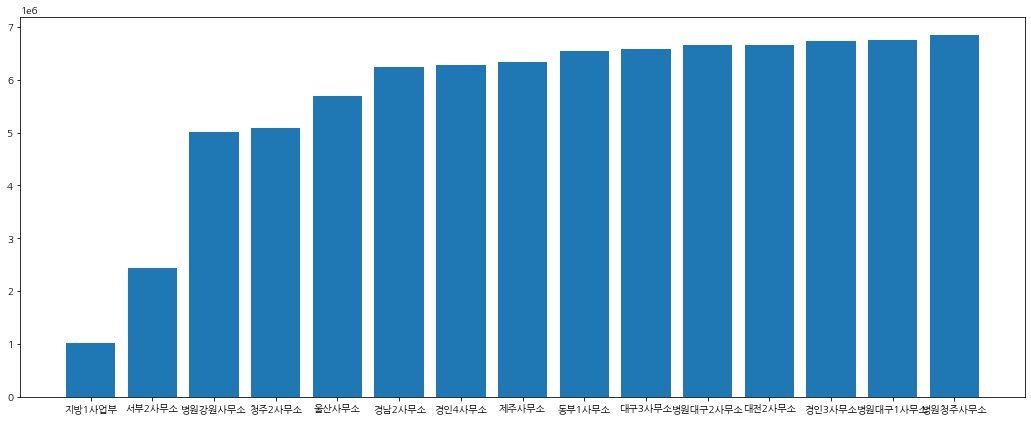

In [121]:
plt.figure(figsize=(18, 7))
b = pd.DataFrame(low10)
df = b.rename_axis('c').reset_index()
plt.bar(df['c'],df['개인사용'])
# 지방1사업부, 서부2사무소의 1인당 개인사용 금액이 가장 낮음

### 월별구별있는 데이터 

In [ ]:
data1.head(2)

,카드번호,기간,년도,월,분기,승인금액,사번,본부,센터,팀,회원명,종류,mp총금액,ip총금액,detail총금액,cps총금액,개인사용,연체여부,직책,성별,주민등록번호,재직여부,key,개인사용비율,MP비율,IP비율,디테일비율,연체금액_부서경비,연체금액_세미나,연체금액_삼성합,연체금액_디테일,연체금액_조직활성화,연체금액_현대합,연체금액_전체,해당월/해당영업사원의 사용한카드수
0,4025-9610-0000-0410,2019-10-01,2019,10,4Q,1538200,2070050,CH본부,CH 1사업부,호남사무소,김종각,현대,0,0,796500,796500,741700,0,NaN,남자,700308.0,1,호남사무소&김종각,0.482186972,0,0,1,0,0,0,0,0,0,0,1
1,4025-9610-0000-0410,2019-11-01,2019,11,4Q,1500580,2070050,CH본부,CH 1사업부,호남사무소,김종각,현대,0,0,390190,390190,1110390,0,NaN,남자,700308.0,1,호남사무소&김종각,0.739973877,0,0,1,0,0,0,0,0,0,0,1


In [122]:
# 년도별 개인사용금액

cardsum=data1['승인금액'].groupby(data1['년도']).sum()
cardsum
cardsum2=data1['개인사용'].groupby(data1['년도']).sum()
cardsum2
card_year=cardsum2/cardsum  
card_year
# 19년도의 개인사용비율이 낮음, 21년도에는 높아짐 그러나 해당 비교는 불가능하다고 본다.
# 왜냐면 21년도는 1-3월, 20년도는 1-12월, 19년도는 10-12월로 월별 차이가 반영될 수 있다.

년도
2019    0.404137
2020    0.373553
2021    0.508812
dtype: float64

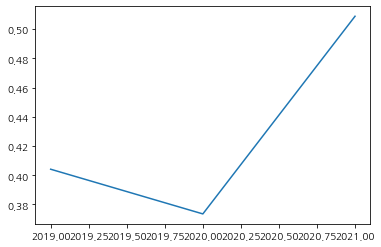

In [123]:
plt.plot(card_year)

In [125]:
# 분기별 개인사용금액
cardsum=data1['승인금액'].groupby(data1['분기']).sum()
cardsum
cardsum2=data1['개인사용'].groupby(data1['분기']).sum()
cardsum2
card_q=cardsum2/cardsum  
card_q
# 1분기 -> 4분기로 갈수록 개인사용의 비율이 줄어듬 / 4분기의 개인사용비율이 가장 적음

분기
1Q    0.532347
2Q    0.486215
3Q    0.239252
4Q    0.189051
dtype: float64

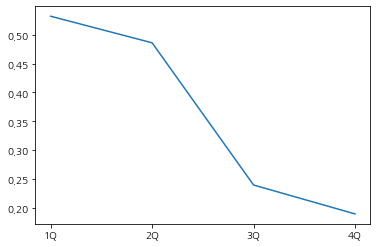

In [126]:
plt.plot(card_q)

In [127]:
# 월별 개인사용금액
cardsum=data1['승인금액'].groupby(data1['월']).sum()
cardsum
cardsum2=data1['개인사용'].groupby(data1['월']).sum()
cardsum2
card_m=cardsum2/cardsum  
card_m
# 1분기 -> 4분기로 갈수록 개인사용의 비율이 줄어듬 / 3분기의 개인사용비율이 가장 적음

월
1     0.435665
2     0.460491
3     0.644509
4     0.558997
5     0.559782
6     0.274538
7     0.258764
8     0.223379
9     0.232240
10    0.207474
11    0.193510
12    0.164353
dtype: float64

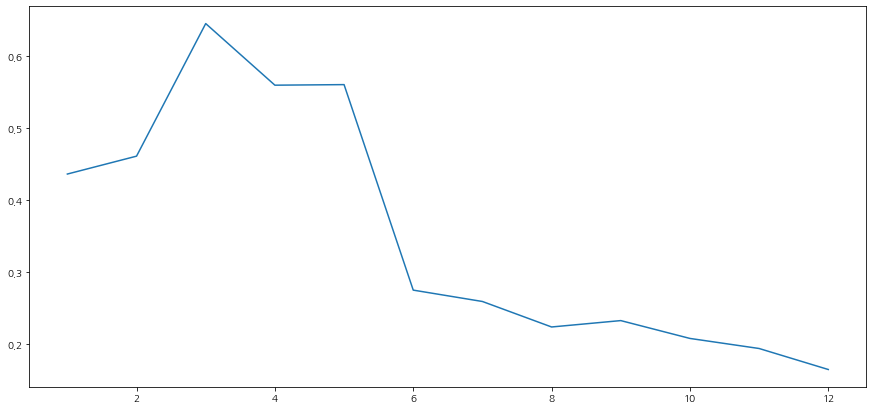

In [128]:
plt.figure(figsize=(15, 7))
plt.plot(card_m) 
# 3월에 가장 많은 개인사용비율이 발견됨, 12월에 가장 적은 개인사용비율
# 9월에 약간 개인사용비율이 늘어나게됨

In [129]:
# 19~21년까지의 흐름 확인
# 월별 개인사용금액
cardsum=data1['승인금액'].groupby(data1['기간']).sum()
cardsum
cardsum2=data1['개인사용'].groupby(data1['기간']).sum()
cardsum2
card_flow=cardsum2/cardsum  
card_flow
# 1분기 -> 4분기로 갈수록 개인사용의 비율이 줄어듬 / 3분기의 개인사용비율이 가장 적음

기간
2019-12-01    0.404137
2020-01-01    0.533222
2020-02-01    0.571485
2020-03-01    0.591582
2020-04-01    0.558997
2020-05-01    0.559782
2020-06-01    0.274538
2020-07-01    0.258764
2020-08-01    0.223379
2020-09-01    0.232240
2020-10-01    0.207474
2020-11-01    0.193510
2020-12-01    0.163103
2021-01-01    0.299553
2021-02-01    0.350197
2021-03-01    0.667418
dtype: float64

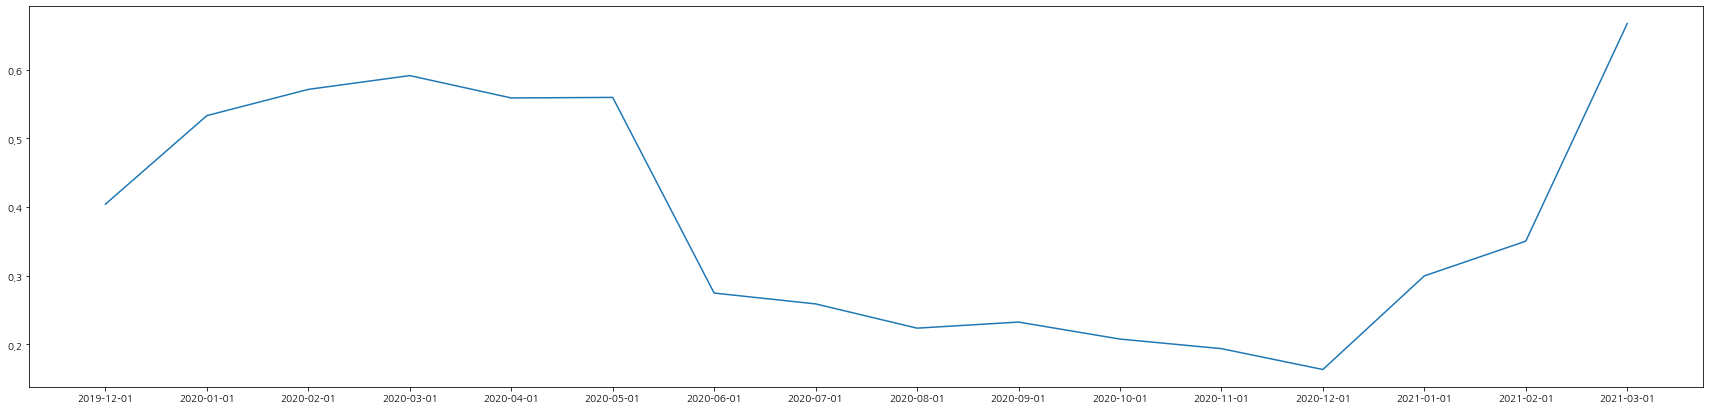

In [130]:
plt.figure(figsize=(30, 7))
plt.plot(card_flow)
# 19.10월~21.3월까지의 흐름을 보여줌

In [131]:
# 19~21년까지의 흐름 확인
# 월별 개인사용금액
cardagree=data1['승인금액'].groupby(data1['기간']).sum()
cardcps=data1['cps총금액'].groupby(data1['기간']).sum()
cardindividual=data1['개인사용'].groupby(data1['기간']).sum()
mp=data1['mp총금액'].groupby(data1['기간']).sum()
ip=data1['ip총금액'].groupby(data1['기간']).sum()
detail=data1['detail총금액'].groupby(data1['기간']).sum()


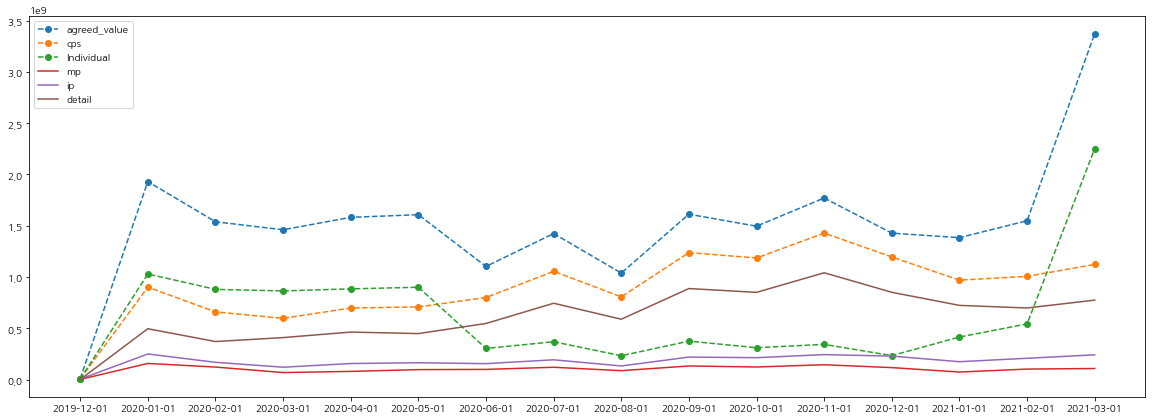

In [132]:
plt.figure(figsize=(20, 7))
plt.plot(cardagree,'o--')
plt.plot(cardcps,'o--')
plt.plot(cardindividual,'o--')
plt.plot(mp)
plt.plot(ip)
plt.plot(detail)
plt.legend(['agreed_value','cps','Individual','mp','ip','detail'])
# 총승인금액이 늘어나면서 개인사용금액도 덩달아 늘어남, 
# cps금액의 증가폭보다 개인사용금액의 증가폭이 크게 나타남

### 세부 사용내역 확인

In [ ]:
# 원본 파일명 : (21.03월)현대카드, (21.03월)삼성카드, 19.10_21.03월사용내역_210928_소장
# (21.03월)현대카드, (21.03월)삼성카드의 내용을 합침(컬럼이 안맞는게 있어서 약간의 수정작업 필요)
# 위에서 만든 데이터에서 19.10_21.03월사용내역_210928_소장은 제외
# card_detail파일 : 21년 3월 법인카드사용 내역
# 해당 법인카드 사용내역이 개인사용만 포함되는지 개인사용+cps가 포함되어있는지 확인필요 
#-------------------------------------------------------------------------------------------------------
#확인결과 잘못된 데이터 사용.
#전체법인카드사용.csv파일사용.19년 10월~21년 3월까지데이터

In [133]:
# card_detail = pd.read_csv('gdrive/MyDrive/DW_DATA/CARD_DETAIL.csv', encoding = 'cp949')  # cp949
card_detail = pd.read_csv('gdrive/MyDrive/DW_DATA/all.csv', encoding = 'UTF-8')  # cp949

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [135]:
# 소장승인된 행들을 제외하고 파악해보기 / 19.10_21.03월사용내역_210928_소장.csv파일(19년 10월~21년 3월까지데이터)
card_detail = card_detail[(card_detail['소장승인여부']=="N")] # 소장승인이 안된 것들에 대해서만 

In [136]:
card_detail.head(3)

,카드번호,회원명,사번,본부,센터,팀,승인일자,승인시각,승인요일상세,승인요일,승인시간대,승인번호,가맹점번호,가맹점사업자번호,가맹점명,가맹점주소,가맹점우편번호,업종명,업종코드,승인취소여부,승인금액,주취급품목명,소장승인여부,년월,연체여부
0,5531-4700-0034-9961,이세민,2030216,CH본부,NaN,CH일반유통팀,2019-10-01,22:08:01,2,평일,22,1326358.0,117921338.0,1.200940e+09,두꺼비,"서울 강남구 역삼로 421,(대치4동)",6197.0,한식,2501,N,354000,한식,N,20.1,N
1,5531-4700-0034-9961,이세민,2030216,CH본부,NaN,CH일반유통팀,2019-10-01,22:32:40,2,평일,22,49769252.0,173137511.0,5.321301e+09,바나나,"서울 서초구 언남17길 18, 지층 (양재동)",6775.0,주점,2402,N,1110000,서양식주점,N,20.1,N
2,5531-4700-0034-9961,이세민,2030216,CH본부,NaN,CH일반유통팀,2019-10-26,19:23:54,6,주말,19,4155874.0,124818411.0,2.110839e+09,영천영화식육식당,"서울 강남구 도산대로90길 3, 1층 2층(청담동)",6070.0,한식,2501,N,740000,한식점업,N,20.1,N


In [ ]:
card_detail.info() # 18개 컬럼, 420773 (소장포함시)479562  행

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479562 entries, 0 to 479561
Data columns (total 24 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   카드번호      479562 non-null  object 
 1   회원명       479562 non-null  object 
 2   사번        479562 non-null  int64  
 3   본부        479562 non-null  object 
 4   센터        472085 non-null  object 
 5   팀         479562 non-null  object 
 6   승인일자      479562 non-null  object 
 7   승인시각      479562 non-null  object 
 8   승인요일      479562 non-null  object 
 9   승인시간대     479562 non-null  int64  
 10  승인번호      479561 non-null  float64
 11  가맹점번호     479562 non-null  float64
 12  가맹점사업자번호  22273 non-null   float64
 13  가맹점명      479562 non-null  object 
 14  가맹점주소     479493 non-null  object 
 15  가맹점우편번호   397431 non-null  float64
 16  업종명       479561 non-null  object 
 17  업종코드      479561 non-null  object 
 18  승인취소여부    479562 non-null  object 
 19  승인금액      479562 non-null  int64  
 20  주취급품

In [ ]:
# 개인사용 업종별 건수 파악
cardsum=card_detail['승인금액'].groupby(card_detail['업종명']).count()
cardsum.sort_values( ascending=False)
# 커피숍 > 일반한식 > 제과점 > 슈퍼마켓 > 일식  ... (총 103개의 업종명)
# 혹시 여기에 사용하면 안되는 업종이 끼어있는지 파악해보면 좋을 것 같음

업종명
커피숍         153361
일반한식         99232
제과점          40937
슈퍼마켓         25276
편의점          17216
             ...  
인테리어  소품         1
남/여성복            1
손해보험             1
소비조합             1
화장품점             1
Name: 승인금액, Length: 68, dtype: int64

In [ ]:
# 개인사용 업종별 승인금액 파악
cardsum=card_detail['승인금액'].groupby(card_detail['업종명']).sum()
cardsum.sort_values( ascending=False)
# 금액으로 따지면 일반한식 > 한식 > 커피숍 > 일식 > 슈퍼마켓

업종명
일반한식     8544007159
한식       5042551548
커피숍      3120021629
일식       2531486258
슈퍼마켓     1519041816
            ...    
일반의류점         53000
테마파크          43600
화장품점          14000
광고/인쇄            20
면세점               0
Name: 승인금액, Length: 68, dtype: int64

In [ ]:
# 업종별 한번에 사용하는 금액을 파악
cardsum=card_detail['승인금액'].groupby(card_detail['업종명']).count()
cardsum
cardsum2=card_detail['승인금액'].groupby(card_detail['업종명']).sum()
cardsum2
ratio=cardsum2/cardsum 
ratio.sort_values( ascending=False)
# 일반용역서비스(120만) > 가례(100만) > 여관(88만원) > 인테리어소품(66만) >  패밀리레스토랑(60만)
# 한번쓸때 사용되는 금액이 생각보다 크다는것을 알 수 있음 / 짜짤하게 조금 쓰는용도로 개인법인카드를 사용하지 않는것으로 보임
# 한번에 사용되는 금액을 한정짓는 것도 괜찮아보임 

업종명
일반용역서비스     1.200000e+06
가례          1.000000e+06
여관          8.855000e+05
인테리어  소품    6.650000e+05
패밀리레스토랑     6.084444e+05
                ...     
편의점         1.914766e+04
종합병원        1.526414e+04
화장품점        1.400000e+04
광고/인쇄       1.000000e+01
면세점         0.000000e+00
Name: 승인금액, Length: 68, dtype: float64

In [ ]:
# 사용시간대별 파악
cardsum=card_detail['승인번호'].groupby(card_detail['승인시간대']).count()
cardsum
cardsum.sort_values( ascending=False)
# 12~3시 점심시간대에 좀 많이 분포, 저녁8시인걸로 보아 저녁시간대
# 시간컬럼 확인결과 22275행 이후부터 일반숫자(1235942이런식)로 입력되어 시간대로 변경이 불가함 / 확인요청해야할듯

승인시간대
0     405041
20      7034
19      3166
21      2691
13       753
18       688
14       502
12       221
17       173
15       125
22       118
11        59
16        58
23        48
1         25
8         15
10        14
7         12
2         12
9          5
3          5
5          4
6          2
4          1
Name: 승인번호, dtype: int64

In [ ]:
cardsum=card_detail['승인번호'].groupby(card_detail['승인요일']).count()
cardsum
cardsum.sort_values( ascending=False) 
#주말사용이 9891(약 2%)

승인요일
평일    410881
주말      9891
Name: 승인번호, dtype: int64

In [ ]:
cardsum=card_detail['승인번호'].groupby(card_detail['승인요일상세']).count()
cardsum
cardsum.sort_values( ascending=False) 
#주말사용이 9891(약 2%)
# 1:월 ~ 7:일
# 화>수>목에 많이 사용함

승인요일상세
2    96597
3    91481
4    87849
5    73297
1    61657
6     7653
7     2238
Name: 승인번호, dtype: int64

In [ ]:
#평일의 사용의 세부내역 확인
card_weekday= card_detail[(card_detail['승인요일']=="평일")]
cardsum=card_weekday['승인금액'].groupby(card_weekday['업종명']).count()
cardsum.sort_values( ascending=False)
# 커피 > 일반한식 > 제과 > 슈퍼마켓 > 편의점
# 차이가 없음

업종명
커피숍         149752
일반한식         97130
제과점          40046
슈퍼마켓         24655
편의점          16648
             ...  
인테리어  소품         1
남/여성복            1
손해보험             1
소비조합             1
화장품점             1
Name: 승인금액, Length: 68, dtype: int64

In [ ]:
#주말의 사용의 세부내역 확인
card_weekday= card_detail[(card_detail['승인요일']=="주말")]
cardsum=card_weekday['승인금액'].groupby(card_weekday['업종명']).count()
cardsum.sort_values( ascending=False)
# 커피 > 일반한식 > 제과 > 슈퍼마켓 > 편의점
# 주말과 평일의 큰 차이는 없어보임

업종명
커피숍         3609
일반한식        2102
제과점          891
슈퍼마켓         621
편의점          568
대형할인매장       368
패스트푸드        358
서양식          277
중국식          247
일식           227
일반주점         211
한식           134
연쇄점           75
특1급호텔         49
기타식품          48
양식            11
호텔            11
종합병원          11
주점            11
간이음식점         10
음반판매장         10
뷔페             9
중식             6
패스트푸드점         5
축산물            3
연금매장           3
콘도,유스호스텔       2
종합식품           2
백화점            2
패밀리레스토랑        2
농축수산물          2
1급관광호텔         2
수산물            1
기타숙박업          1
2급관광호텔         1
Name: 승인금액, dtype: int64

In [ ]:
# 업태 파악
cardsum=card_detail['승인번호'].groupby(card_detail['주취급품목명']).count()
cardsum
len(cardsum)  
# 업태는 총 340개로 좀더 세분화되어있음 / 그냥 업종 컬럼을 사용하는게 나아보임

340

In [ ]:
cardsum  # 업태로는 파악하는건 안좋아보임


주취급품목명
.           68
..           1
DMATLR       1
EHAO        10
ㅇ므식          5
          ... 
휴게음료         5
휴게음식      1238
휴게음식업       15
휴게음식점     2335
휴게음식점업     218
Name: 승인번호, Length: 340, dtype: int64

In [ ]:
# 가장 빈번/가장 많이 사용한 카드번호의 정보를 나열
# 카드별 
cardsum=card_detail['승인금액'].groupby(card_detail['카드번호']).count()
cardsum.sort_values( ascending=False)
# 가장많이 사용한 경우 해당기간동안 2144번 사용함 
#4025-9610-3910-1320    2144
#4025-9610-3872-8503    2008
#4025-9610-3593-1001    1619
#4025-9610-3836-1818    1587
#4025-9610-3590-7209    1542

카드번호
4025-9610-3910-1320    2144
4025-9610-3872-8503    2008
4025-9610-3593-1001    1619
4025-9610-3836-1818    1587
4025-9610-3590-7209    1542
                       ... 
5531-4700-0019-4227       1
5531-4700-0042-6678       1
5531-4700-0034-7767       1
5531-4700-0030-2101       1
5531-4700-0039-6269       1
Name: 승인금액, Length: 1645, dtype: int64

In [ ]:
# 가장 빈번/가장 많이 사용한 영업사원의 정보를 나열
# 카드별 
cardsum=card_detail['승인금액'].groupby(card_detail['사번']).count()
cardsum.sort_values( ascending=False)
# 해당기간동안 가장 많이 사용한 영업사원들
#2070319    2170
#2110156    2170
#2130241    1778
#2180562    1643
#2100253    1620

사번
2070319    2170
2110156    2170
2130241    1778
2180562    1643
2100253    1620
           ... 
2180036      16
2180115      16
2190063      11
2160234       9
2210190       8
Name: 승인금액, Length: 676, dtype: int64

In [ ]:
# 카드번호별 승인금액합
# 카드별 
cardsum=card_detail['승인금액'].groupby(card_detail['카드번호']).sum()
cardsum.sort_values( ascending=False)
# 가장 많이 사용했다고 해서 승인금액이 큰것은 아님. 
#4670-6901-0014-5043    135770867
#4025-9610-3590-7209     94350710
#4025-9610-3592-8601     87407060
#4025-9610-3589-6600     85020395

카드번호
4670-6901-0014-5043    135770867
4025-9610-3590-7209     94350710
4025-9610-3592-8601     87407060
4025-9610-3589-6600     85020395
5531-4700-0032-4121     80786300
                         ...    
5531-4210-2562-7006       107900
5531-4700-0031-7653        97920
5531-4700-0032-5169        94000
5531-4700-0034-7668        89000
4025-9610-5430-5806        39500
Name: 승인금액, Length: 1645, dtype: int64

In [ ]:
# 영업사원별 승인금액합
# 카드별 
cardsum=card_detail['승인금액'].groupby(card_detail['사번']).sum()
cardsum.sort_values( ascending=False)
# 가장 많이 사용했다고 해서 승인금액이 큰것은 아님. 
#2070319    160915010
#2030273    135770867
#2050348    133229490
#2120153    125089680

사번
2070319    160915010
2030273    135770867
2050348    133229490
2120153    125089680
2180562    116002280
             ...    
2110114       712990
2210161       626400
2110189       567550
2160388       281520
2180018       227600
Name: 승인금액, Length: 676, dtype: int64

In [ ]:
# 많이 사용한 카드번호/영업사원들은 어떤용도로 많이 사용하게 되는지 세부내역을 파악해보면 좋을것 같음
# 어떤사유/목적으로 많이 사용하는지 확인
# 위의 네가지영역별로 상위 100명 추리기 -> 이에 해당하는 세부사용내역 확인

In [ ]:
# 중간결론
# 세부내역에서 뭔가 특별한 무언가 발견될거라 생각했는데, 

### 개인사용비율과 세부사용내역 merge

In [ ]:
# 해당 영업사원의 개인사용비율/연체여부와도 같이 확인 가능
# 연체여부와 연계시켜서 확인하기
# 연체 발생한 카드의 해당월에 사용한 내역이 무엇인지 확인해보기
# 어떤용도로 사용하다가 연체가 되었는지 확인해보기

In [ ]:
card_late = card_detail[(card_detail['연체여부']=="Y")]

In [ ]:
len(card_late)

9640

In [ ]:
cardlate= card_late['카드번호'].unique()  # 126개

In [ ]:
len(cardlate) # 카드번호로는 126개

126

In [ ]:
# 연체된경우,  개인사용 업종별 건수 파악
cardsum=card_late['승인금액'].groupby(card_late['업종명']).count()
cardsum.sort_values(ascending=False)
# 커피숍 > 일반한식 > 제과점 > 슈퍼마켓 > 일식  ... (총 103개의 업종명)
# 연체되었어도 사용은 비슷하게 나타남을 알 수 있음.

업종명
커피숍         3252
일반한식        2667
제과점          730
슈퍼마켓         551
편의점          431
일식           398
패스트푸드        316
대형할인매장       270
중국식          226
서양식          209
한식           205
일반주점         118
기타식품          58
종합병원          49
연쇄점           37
특1급호텔         26
뷔페            22
중식            13
양식            11
종합식품          10
음반판매장          7
문방구            5
정육점            4
광고/인쇄          4
간이음식점          3
콘도,유스호스텔       3
농축수산물          3
축산물            2
기타사무용품         2
특2급호텔          2
호텔             1
남/여성복          1
복지매장/조합        1
수산물            1
연금매장           1
PG쇼핑몰          1
Name: 승인금액, dtype: int64

In [ ]:
# 연체된경우, 개인사용 업종별 승인금액 파악
cardsum=card_late['승인금액'].groupby(card_late['업종명']).sum()
cardsum.sort_values( ascending=False)
# 금액으로 따지면 일반한식 > 한식 > 커피숍 > 일식 > 슈퍼마켓

업종명
일반한식        241764934
한식           96875910
커피숍          66116940
일식           60789100
슈퍼마켓         35739220
제과점          20252039
서양식          19764221
중국식          14980320
대형할인매장       14467780
편의점          11721830
패스트푸드         8457510
양식            7061700
중식            6791000
일반주점          6687700
종합식품          4816000
기타식품          4113000
특1급호텔         3755147
뷔페            3738800
광고/인쇄         1200000
종합병원          1038000
간이음식점         1020000
축산물            969700
연쇄점            877050
문방구            745500
정육점            697700
수산물            495000
호텔             495000
남/여성복          425524
농축수산물          417050
음반판매장          277275
콘도,유스호스텔       158500
기타사무용품          81950
특2급호텔           69500
PG쇼핑몰           56000
복지매장/조합         32800
연금매장             3600
Name: 승인금액, dtype: int64

In [ ]:
# 연체된경우 결제내역에 어떤 특이한점이 있는지 파악해보고자 여러 시도를 해봄
#

### 사용한도와의 상관관계 확인

### 사번/카드 기준으로 봤을때의 연체여부 

In [ ]:
# 기존데이터에서 임원/소장들을 제거

In [137]:
data2 # 1645 rows × 27 columns

,카드번호,종류,사번,소장여부,회원명,카드번호&사번&종류,승인금액,mp총금액,ip총금액,pre_detail총금액,detail총금액,pre_cps총금액,cps총금액,pre_개인사용,개인사용,연체여부,연체금액_부서경비,연체금액_세미나,연체금액_디테일,연체금액_조직활성화,연체금액_전체,사용개월수,본부,센터,팀,소속기준월,영업사원성별,영업사원나이,영업사원나이대,영업사원직책,개인사용비율,ip_ratio,mp_ratio,detail_ratio,연체구분
0,4670-6901-0008-6254,삼성,2020347,N,박수진,4670-6901-0008-62542020347삼성,53456466.0,0.0,0.0,0.0,0.0,0.0,0.0,53456466.0,53456466,0.0,0.0,0.0,0.0,0.0,0.0,18,ETC본부,서울4사업부,서울4사업부,2021-03-01,남자,50.0,50.0,본부장,1.000000,NaN,NaN,NaN,0
1,4670-6901-0017-0512,삼성,2020347,N,박수진,4670-6901-0017-05122020347삼성,35873690.0,0.0,0.0,0.0,0.0,0.0,0.0,35873690.0,35873690,0.0,0.0,0.0,0.0,0.0,0.0,18,ETC본부,서울4사업부,서울4사업부,2021-03-01,남자,50.0,50.0,본부장,1.000000,NaN,NaN,NaN,0
2,4670-6901-0014-5043,삼성,2030273,N,유창득,4670-6901-0014-50432030273삼성,135770867.0,0.0,0.0,0.0,0.0,0.0,0.0,135770867.0,135770867,0.0,0.0,0.0,0.0,0.0,0.0,18,ETC본부,서울3사업부,서울3사업부,2021-03-01,남자,45.0,40.0,사업부장,1.000000,NaN,NaN,NaN,0
3,4025-9610-3142-0603,현대,2010088,N,박형철,4025-9610-3142-06032010088현대,26982920.0,0.0,0.0,587800.0,587800.0,587800.0,587800.0,26395120.0,26395120,0.0,0.0,0.0,0.0,0.0,0.0,18,ETC본부,서울2사업부,병원경인사무소,2021-03-01,남자,47.0,40.0,사업부장,0.978216,0.0,0.0,1.0,0
4,4025-9610-3591-0104,현대,2010088,N,박형철,4025-9610-3591-01042010088현대,24170070.0,0.0,0.0,17698360.0,17698360.0,17698360.0,17698360.0,6471710.0,6471710,1.0,0.0,0.0,0.0,0.0,0.0,18,ETC본부,서울2사업부,병원경인사무소,2021-03-01,남자,47.0,40.0,사업부장,0.267757,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636,4025-9610-4553-0900,현대,2090364,Y,최선일,4025-9610-4553-09002090364현대,16070845.0,0.0,0.0,829340.0,15588595.0,829340.0,15588595.0,15241505.0,482250,0.0,0.0,0.0,0.0,0.0,0.0,18,ETC본부,서울3사업부,동부1사무소,2021-03-01,남자,40.0,40.0,소장,0.030008,0.0,0.0,1.0,0
1638,4025-9610-4495-5900,현대,2070235,Y,이종환,4025-9610-4495-59002070235현대,14163850.0,0.0,0.0,638750.0,14082650.0,638750.0,14082650.0,13525100.0,81200,0.0,0.0,0.0,0.0,0.0,0.0,18,ETC본부,서울3사업부,남부2사무소,2021-03-01,남자,45.0,40.0,소장,0.005733,0.0,0.0,1.0,0
1639,4025-9610-4128-5210,현대,2100071,Y,하상철,4025-9610-4128-52102100071현대,15724900.0,0.0,0.0,108000.0,14790500.0,108000.0,14790500.0,15616900.0,934400,0.0,0.0,0.0,0.0,0.0,0.0,9,ETC본부,지방3사업부,경남2사무소,2020-06-01,남자,38.0,30.0,직원,0.059422,0.0,0.0,1.0,0
1640,4025-9610-4091-3010,현대,2010277,Y,주병옥,4025-9610-4091-30102010277현대,9700100.0,0.0,0.0,479700.0,9486800.0,479700.0,9486800.0,9220400.0,213300,0.0,0.0,0.0,0.0,0.0,0.0,18,ETC본부,지방2사업부,병원광주2사무소,2021-03-01,남자,48.0,40.0,소장,0.021989,0.0,0.0,1.0,0


In [138]:
data_filter = data2[(data2['소장여부']=="N")]
data_filter # 1614 rows × 27 columns

,카드번호,종류,사번,소장여부,회원명,카드번호&사번&종류,승인금액,mp총금액,ip총금액,pre_detail총금액,detail총금액,pre_cps총금액,cps총금액,pre_개인사용,개인사용,연체여부,연체금액_부서경비,연체금액_세미나,연체금액_디테일,연체금액_조직활성화,연체금액_전체,사용개월수,본부,센터,팀,소속기준월,영업사원성별,영업사원나이,영업사원나이대,영업사원직책,개인사용비율,ip_ratio,mp_ratio,detail_ratio,연체구분
0,4670-6901-0008-6254,삼성,2020347,N,박수진,4670-6901-0008-62542020347삼성,53456466.0,0.0,0.0,0.0,0.0,0.0,0.0,53456466.0,53456466,0.0,0.0,0.0,0.0,0.0,0.0,18,ETC본부,서울4사업부,서울4사업부,2021-03-01,남자,50.0,50.0,본부장,1.000000,NaN,NaN,NaN,0
1,4670-6901-0017-0512,삼성,2020347,N,박수진,4670-6901-0017-05122020347삼성,35873690.0,0.0,0.0,0.0,0.0,0.0,0.0,35873690.0,35873690,0.0,0.0,0.0,0.0,0.0,0.0,18,ETC본부,서울4사업부,서울4사업부,2021-03-01,남자,50.0,50.0,본부장,1.000000,NaN,NaN,NaN,0
2,4670-6901-0014-5043,삼성,2030273,N,유창득,4670-6901-0014-50432030273삼성,135770867.0,0.0,0.0,0.0,0.0,0.0,0.0,135770867.0,135770867,0.0,0.0,0.0,0.0,0.0,0.0,18,ETC본부,서울3사업부,서울3사업부,2021-03-01,남자,45.0,40.0,사업부장,1.000000,NaN,NaN,NaN,0
3,4025-9610-3142-0603,현대,2010088,N,박형철,4025-9610-3142-06032010088현대,26982920.0,0.0,0.0,587800.0,587800.0,587800.0,587800.0,26395120.0,26395120,0.0,0.0,0.0,0.0,0.0,0.0,18,ETC본부,서울2사업부,병원경인사무소,2021-03-01,남자,47.0,40.0,사업부장,0.978216,0.0,0.0,1.0,0
4,4025-9610-3591-0104,현대,2010088,N,박형철,4025-9610-3591-01042010088현대,24170070.0,0.0,0.0,17698360.0,17698360.0,17698360.0,17698360.0,6471710.0,6471710,1.0,0.0,0.0,0.0,0.0,0.0,18,ETC본부,서울2사업부,병원경인사무소,2021-03-01,남자,47.0,40.0,사업부장,0.267757,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,5531-4700-0032-1119,삼성,2180222,N,김건도,5531-4700-0032-11192180222삼성,7761200.0,5602850.0,0.0,0.0,0.0,5602850.0,5602850.0,2158350.0,2158350,4.0,0.0,1250336.0,0.0,0.0,1250336.0,13,ETC본부,지방4사업부,광주2사무소,2020-10-01,NaN,NaN,NaN,NaN,0.278095,0.0,1.0,0.0,4
1610,5531-4700-0034-5738,삼성,2180117,N,주영호,5531-4700-0034-57382180117삼성,20711000.0,0.0,18107000.0,0.0,0.0,18107000.0,18107000.0,2604000.0,2604000,0.0,0.0,0.0,0.0,0.0,0.0,19,ETC본부,지방4사업부,전주사무소,2021-01-01,NaN,NaN,NaN,NaN,0.125730,1.0,0.0,0.0,0
1611,5531-4700-0039-7366,삼성,2200007,N,문강호,5531-4700-0039-73662200007삼성,2413900.0,1736565.0,0.0,0.0,0.0,1736565.0,1736565.0,677335.0,677335,0.0,0.0,0.0,0.0,0.0,0.0,15,ETC본부,지방4사업부,광주1사무소,2021-03-01,NaN,NaN,NaN,NaN,0.280598,0.0,1.0,0.0,0
1612,5531-4700-0039-7671,삼성,2190239,N,김정연,5531-4700-0039-76712190239삼성,693000.0,346500.0,0.0,0.0,0.0,346500.0,346500.0,346500.0,346500,0.0,0.0,0.0,0.0,0.0,0.0,8,ETC본부,지방4사업부,청주2사무소,2020-08-01,NaN,NaN,NaN,NaN,0.500000,0.0,1.0,0.0,0


In [ ]:
# 사번기준으로 했을때의 연체

In [139]:
data_filter['연체여부'].unique() # 각 카드번호에 대해 몇달의 연체를 하였는지를 보여줌 값만 가짐

array([ 0.,  1.,  7.,  2.,  9.,  4.,  8.,  5.,  3.,  6., 10., 14., 16.,
       18., 15., 11., nan, 24.])

In [141]:
cardsum=data_filter['연체여부'].groupby(data_filter['사번']).sum()
cardsum  # 사번별로 연체카드 연체개월수의 합계를 나타냄
b = pd.DataFrame(cardsum)
b  # 550 사번

b[b['연체여부']>0] # 222 


,연체여부
사번,
1952624,3.0
1960487,2.0
1971018,5.0
1971917,6.0
1990059,2.0
...,...
2200125,5.0
2200154,1.0
2200158,2.0


In [13]:
# 아래와 같은 사항도 확인해볼수있다.
# 1. 영업사원마다 여러개의 카드를 가지고있는데, n개전부 연체

# 2. 영업사원마다 여러개의 카드를 가지고있는데, n개중 일부만 연체


In [142]:
b[b['연체여부']>20]  # 연체개월수가 20개월 이상인 사번들 (카드가 여러개여서 연체개월수가 높아질수는 있음) 

,연체여부
사번,
2030138,25.0
2070318,25.0
2100112,35.0
2170314,32.0
2180489,28.0
2190184,21.0


In [143]:
cardsum=data_filter['사번'].groupby(data_filter['연체여부']).count()
cardsum
b = pd.DataFrame(cardsum)
b
# 해당기간동안 연체한 카드번호 1383 - 1008 =375

,사번
연체여부,
0.0,1008
1.0,142
2.0,65
3.0,38
4.0,28
5.0,30
6.0,22
7.0,9
8.0,13


In [144]:
# ETC영업본부만 가지고 확인하기

data_filter = data_filter[data_filter['본부']=='ETC본부']

In [ ]:
# 카드번호기준으로 했을때의 연체

In [146]:
cardsum=data_filter['연체여부'].groupby(data_filter['카드번호']).sum()
cardsum
b = pd.DataFrame(cardsum)
b
b #전체 : 1614
b[b['연체여부']==2]  # 70
b[b['연체여부']==3]  # 40
b[b['연체여부']==4] # 29
b[b['연체여부']>5] # 74개 카드는 연체가 5번을 넘는 카드들, 정지를 고려/관찰필요
b[b['연체여부']==0] # 1209 (75%)
b[b['연체여부']==1] # 162 


,연체여부
카드번호,
4025-9610-3141-9704,1.0
4025-9610-3587-7204,1.0
4025-9610-3588-3103,1.0
4025-9610-3588-3509,1.0
4025-9610-3588-4804,1.0
...,...
5531-4700-0042-3139,1.0
5531-4700-0042-4038,1.0
6243-7810-0061-3801,1.0


### 디테일의 세부내용

In [16]:
# 받은 파일에서 사용한도 금액에 대한 컬럼을못찾겠음.
# 미리 질문하지 못한 잘못임 
# 사번기준으로 가능예산을 구해야함 -> 이에대한 문의를 하고자함
# 해당 사번의 디테일 사용금액/전체 사용금액/전체사용 가용예산/디테일 가용예산 뒤에 두개 컬럼 값을 어떻게 구하는지 물어보려함 
# 디테일 한달 사용금액 < > ? 디테일 가용예산금액 
# 디테일 사용금액 > 디테일 가용예산금액 인경우의 특징을 알아보려함


In [147]:
# 월별 구분한 데이터
data3 = pd.read_csv('gdrive/MyDrive/DW_DATA/detail_예산.csv', encoding = 'cp949')  # cp949

In [ ]:
data3.head(2)

,사번,pre_승인금액,승인금액,mp총금액,ip총금액,detail총금액,cps총금액,pre_개인사용,개인사용,임원/소장승인개인금액,소장_부서비,해당월/해당영업사원의 사용한카드수,개수 : 카드번호,연체여부,detail예산,삼성카드수,현대카드수
0,1000026,8846920,6481200,0,0,2158200,2158200,6688720,4323000,4523920,2365720,24,6,0,NaN,1,3
1,1000039,30089000,45172480,0,0,15083480,15083480,15005520,30089000,0,-15083480,20,18,2,NaN,1,2


In [ ]:
data_detail = data3[data3['detail예산']>0]

In [ ]:
data_detail.head(2)
  # 318 x 17

,사번,pre_승인금액,승인금액,mp총금액,ip총금액,detail총금액,cps총금액,pre_개인사용,개인사용,임원/소장승인개인금액,소장_부서비,해당월/해당영업사원의 사용한카드수,개수 : 카드번호,연체여부,detail예산,삼성카드수,현대카드수
351,2130228,63400480,102794990,0,0,39394510,39394510,24005970,63400480,0,-39394510,36,18,6,171891423.9,1,1
352,2030128,50107610,83924370,0,0,33816760,33816760,16290850,50107610,0,-33816760,33,18,0,170707076.7,2,1


In [ ]:
# 새로운 컬럼 만들기 , 예산보다 detail을 더 많이 사용한것에 대해서 라벨링 걸기

data_detail["예산초과금액"] = data_detail['detail총금액'] - data_detail['detail예산'] 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
def detail(x):
 if x>=0: return 'y'
 else: return 'n'

data_detail["detail예산초과여부"] = data_detail["예산초과금액"].apply(detail)
data_detail.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,사번,pre_승인금액,승인금액,mp총금액,ip총금액,detail총금액,cps총금액,pre_개인사용,개인사용,임원/소장승인개인금액,소장_부서비,해당월/해당영업사원의 사용한카드수,개수 : 카드번호,연체여부,detail예산,삼성카드수,현대카드수,예산초과금액,detail예산초과여부
351,2130228,63400480,102794990,0,0,39394510,39394510,24005970,63400480,0,-39394510,36,18,6,171891423.9,1,1,-132496913.9,n
352,2030128,50107610,83924370,0,0,33816760,33816760,16290850,50107610,0,-33816760,33,18,0,170707076.7,2,1,-136890316.7,n


In [ ]:
# 예산을 초과한 비율 확인
# 업종별 한번에 사용하는 금액을 파악
cardsum=data_detail['사번'].groupby(data_detail['detail예산초과여부']).count()
cardsum
# 301명 예산초과 안함/ 17명 예산초과함(비율로 따지면 5%)

detail예산초과여부
n    301
y     17
Name: 사번, dtype: int64

In [ ]:
pivot_day = dfm1.pivot_table(index=['empnum','businessnumber']
    , values=['MBO','mp_num','mp_cost','ip_num','ip_cost','consult_num','consult_cost','lecture_num','lecture_cost','detail_num','detail_cost','mp_ox','ip_ox','consult_ox','lecture_ox','detail_ox', 'actsum_num',	'actsum_cost','actsum_YN']
    , aggfunc = 'sum')

In [ ]:
# 예산을 초과한 집단의 연체여부

In [ ]:
# 요일별/평일주말별 어떤용도로 많이 쓰는지 확인해보기

# pivot_table 명령어를 활용해서 4개월간의 영업활동의 합 구하기 
# https://wikidocs.net/46755 위키독스 자료 참고 : pivot_table
pivot_day = dfm1.pivot_table(index=['empnum','businessnumber']
    , values=['MBO','mp_num','mp_cost','ip_num','ip_cost','consult_num','consult_cost','lecture_num','lecture_cost','detail_num','detail_cost','mp_ox','ip_ox','consult_ox','lecture_ox','detail_ox', 'actsum_num',	'actsum_cost','actsum_YN']
    , aggfunc = 'sum')
df_2  # 9345 rows